## Word Embedding with Word2Vec

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two
main training algorithms that can be used to learn the embedding from text.

- Continuous Bag-of-Words (CBOW) 
- skip grams.

Gensim provides the ```Word2Vec``` class for working with a Word2Vec model. Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new ```Word2Vec()``` instance.

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [12]:
reviews = [['Well', 'done'],
            ['Good','work'],
            ['Great', 'effort'],
            ['nice', 'work'],
            ['Excellent'],
            ['Weak'],
            ['Poor', 'effort'],
            ['not', 'good'],
            ['poor', 'work'],
            ['Could', 'have', 'done', 'better']]

In [19]:
model = Word2Vec(reviews, min_count=1, vector_size=100, sg=0)

In [20]:
# summarize vocab
words = list(model.wv.key_to_index)
print(words)

['work', 'effort', 'done', 'better', 'have', 'Could', 'poor', 'good', 'not', 'Poor', 'Weak', 'Excellent', 'nice', 'Great', 'Good', 'Well']


In [21]:
word_embeddings = model.wv[model.wv.key_to_index]
print(word_embeddings)

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03 ... -7.0415614e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6198989e-03  3.6658279e-03  5.1900111e-03 ... -2.3915735e-03
  -9.5103290e-03  4.5059882e-03]
 [ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 ...  5.1259040e-04
   8.2130842e-03 -7.0190406e-03]
 ...
 [-9.5001198e-03  9.5622232e-03 -7.7707553e-03 ... -3.1351089e-03
  -6.3388203e-03  9.8700766e-03]
 [ 7.6966453e-03  9.1206403e-03  1.1355019e-03 ...  8.2682967e-03
  -6.0985493e-03  9.4382809e-03]
 [-7.1909428e-03  4.2328904e-03  2.1633934e-03 ...  9.4380733e-03
   7.0552849e-03  6.7549516e-03]]


In [25]:
# embedding of a word

model.wv['Well']

array([-7.1909428e-03,  4.2328904e-03,  2.1633934e-03,  7.4407146e-03,
       -4.8892666e-03, -4.5643472e-03, -6.0981750e-03,  3.2993674e-03,
       -4.4994638e-03,  8.5228849e-03, -4.2888285e-03, -9.1054197e-03,
       -4.8163556e-03,  6.4164903e-03, -6.3713240e-03, -5.2615381e-03,
       -7.3044109e-03,  6.0222601e-03,  3.3575939e-03,  2.8483891e-03,
       -3.1385517e-03,  6.0308911e-03, -6.1527467e-03, -1.9801022e-03,
       -5.9830830e-03, -9.9568127e-04, -2.0209861e-03,  8.4859440e-03,
        7.8001023e-05, -8.5753277e-03, -5.4290984e-03, -6.8759872e-03,
        2.6923800e-03,  9.4566466e-03, -5.8159973e-03,  8.2650259e-03,
        8.5320519e-03, -7.0626400e-03, -8.8832136e-03,  9.4691822e-03,
        8.3743641e-03, -4.6908925e-03, -6.7260410e-03,  7.8421356e-03,
        3.7633444e-03,  8.0955029e-03, -7.5715468e-03, -9.5250849e-03,
        1.5774060e-03, -9.8057678e-03, -4.8858859e-03, -3.4601046e-03,
        9.6209217e-03,  8.6235693e-03, -2.8356076e-03,  5.8268714e-03,
      

In [22]:
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

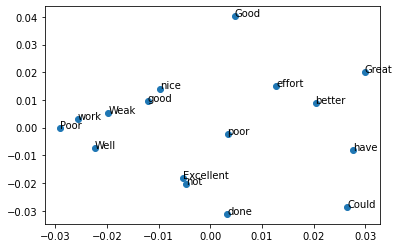

In [23]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()